Reading dataset and dropping columns 

In [1]:
import csv

# Function to read  dataset 
def read_text_dataset(file_path):
    with open(file_path, 'r') as file:
        dataset = [line.strip().split(',') for line in file.readlines()]

        
    return dataset

# Function to write dataset to another text file 
def write_to_file(dataset, output_file):
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(dataset)

# keep only personality scores, amphetamine, benzos, cannabis, heroin, ketamine, methadone, serm columen
def drop_columns(dataset):
    for row in dataset:
        for column_index in sorted([1,2,3, 4, 5, 13, 15, 17, 19, 20, 21, 22, 23, 25, 26, 28, 29, 31], reverse=True):
            del row[column_index]

# Input text dataset file path
input_file_path = 'drug_consumption.txt'

# Output CSV file path
output_csv_path = 'drug_consuption_2.txt'

# Read text dataset
dataset = read_text_dataset(input_file_path)
drop_columns(dataset)
# Write dataset in a new file 
write_to_file(dataset, output_csv_path)
dataset_new = read_text_dataset('drug_consuption_2.txt')

print(dataset[0])

['1', '0.31287', '-0.57545', '-0.58331', '-0.91699', '-0.00665', '-0.21712', '-1.18084', 'CL2', 'CL2', 'CL0', 'CL0', 'CL0', 'CL0']


Bar plot for users of each drug 

[101, 95, 458, 4, 73, 0]
[102, 95, 463, 4, 73, 0]


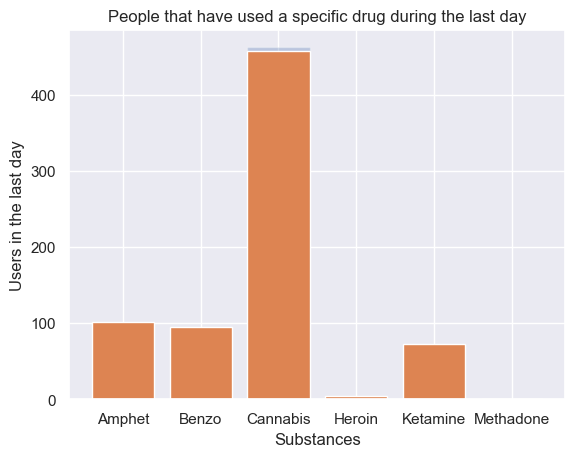

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")
total_nr_signs = 0
nr_images = 0
categories = ['Amphet','Benzo','Cannabis', 'Heroin',  'Ketamine', 'Methadone']
variables = [0,0,0,0,0,0]
variables_overclaiming = [0, 0, 0, 0, 0, 0]


num_categories = len(categories)


bar_width = 0.10
bar_positions = np.arange(num_categories)


diff = {}
for row in dataset_new: 
    for i in range(8,14): 
    
        if row[i] == 'CL6'and row[13] == 'CL0':
            variables[i-8]+=1
            variables_overclaiming[i-8]+=1

        elif row[i] == 'CL6': 
            variables_overclaiming[i-8]+=1


print(variables)
print(variables_overclaiming)
        
    
    
plt.bar(
        bar_positions,
        variables_overclaiming,
        alpha=0.3,

        
)



plt.bar(
        bar_positions,
        variables,
        alpha=1.0,
        
        
    )

plt.xticks(ticks=range(len(categories)), labels=categories)


plt.xlabel('Substances')
plt.ylabel('Users in the last day')
plt.title('People that have used a specific drug during the last day')

plt.show()


Pie chart extraversion scores 

(-1.099999219094978,
 1.0999974282164653,
 -1.099995951064149,
 1.0999996823864107)

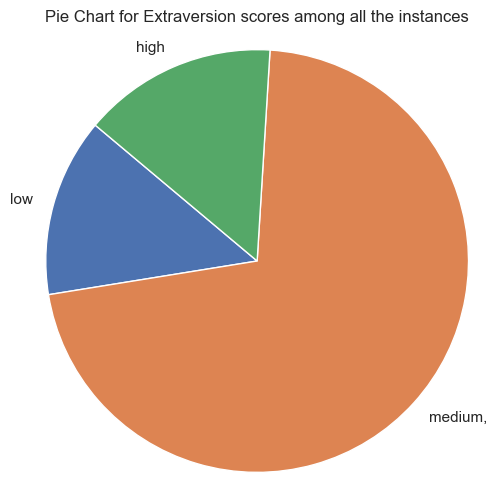

In [24]:
from collections import Counter
sens_seeking_values = []
values = [0, 0, 0]
for row in dataset_new: 
            
    sens_seeking_values.append(float(row[2]))
          
    for e in sens_seeking_values:
        if e < - 1:
            values[0]+=1 
        elif e <=1 and e >= -1: 
            values[1]+=1
        elif e > 1: 
            values[2]+=1       


class_counts = Counter(sens_seeking_values)
  
class_labels = ["low", "medium,", "high"] 
plt.figure(figsize=(6, 6))
plt.pie(values, labels=class_labels, startangle=140)
plt.title('Pie Chart for Extraversion scores among all the instances')
plt.axis('equal')   

Pie charts extraversion scores among users of a specific substance 

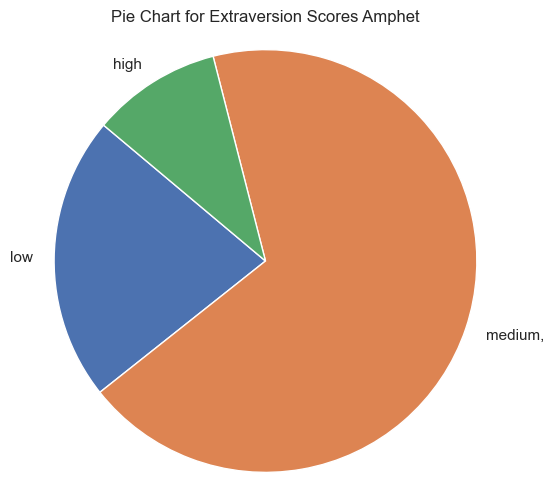

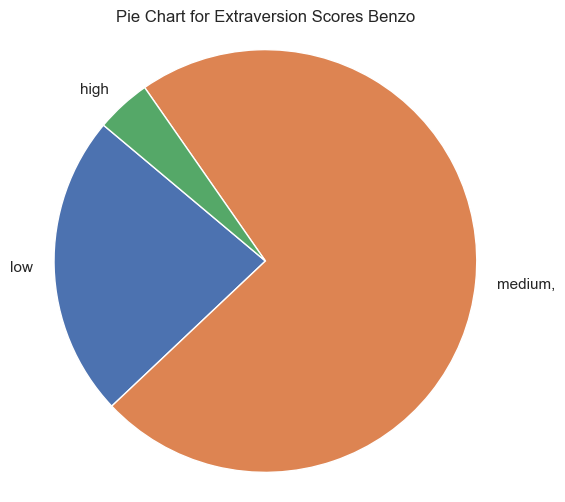

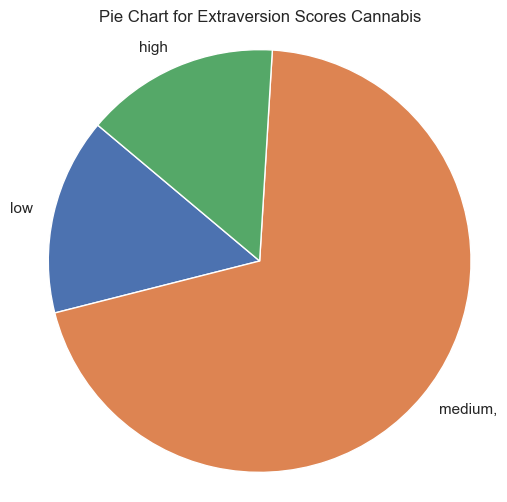

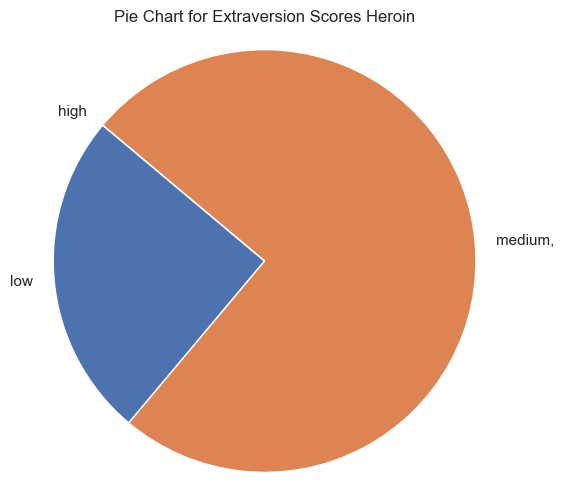

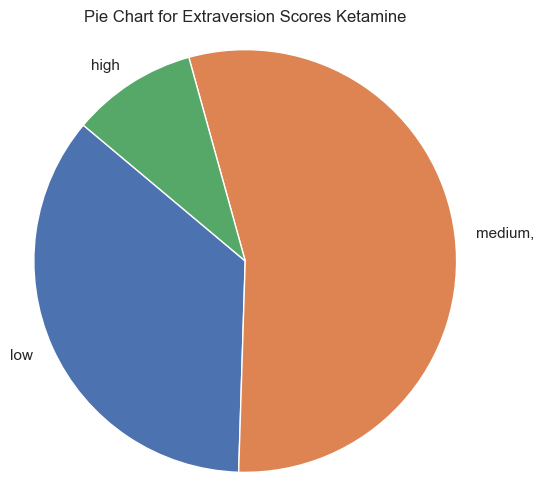

In [30]:
from collections import Counter
dataset
j = 0
for i in range(8,13): 
    sens_seeking_values = []
    values = [0, 0, 0]
    for row in dataset_new: 
        if row[i] == 'CL6'and row[13] == 'CL0':
            
            sens_seeking_values.append(float(row[2]))
          
    for e in sens_seeking_values:
        if e < - 1:
            values[0]+=1 
        elif e <=1 and e >= -1: 
            values[1]+=1
        elif e > 1: 
            values[2]+=1       


    class_counts = Counter(sens_seeking_values)
  
    class_labels = ["low", "medium,", "high"] 
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=class_labels, startangle=140)
    plt.title('Pie Chart for Extraversion Scores '+ categories[j])
    plt.axis('equal')   
    j+=1